In [2]:
#importing the required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'
print(root_path)

Mounted at /content/gdrive
gdrive/My Drive/


In [7]:
#get train and test data paths
data_dir_train = pathlib.Path('gdrive/My Drive/Assignment_images/Train')
data_dir_test = pathlib.Path('gdrive/My Drive/Assignment_images/Test')
#data_dir_train = pathlib.Path('gdrive/My Drive/UPGRAD/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
#data_dir_test = pathlib.Path('gdrive/My Drive/UPGRAD/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [8]:
#Check the count of images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [9]:
#set batch size and image height and width
batch_size  = 32
img_height = 180
img_width= 180

In [10]:
#Splitting train and test dataset
(train_ds),(val_ds) = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',validation_split=0.2,subset="both",image_size=(img_height,img_width),seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.


In [11]:
#get the class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualize the data

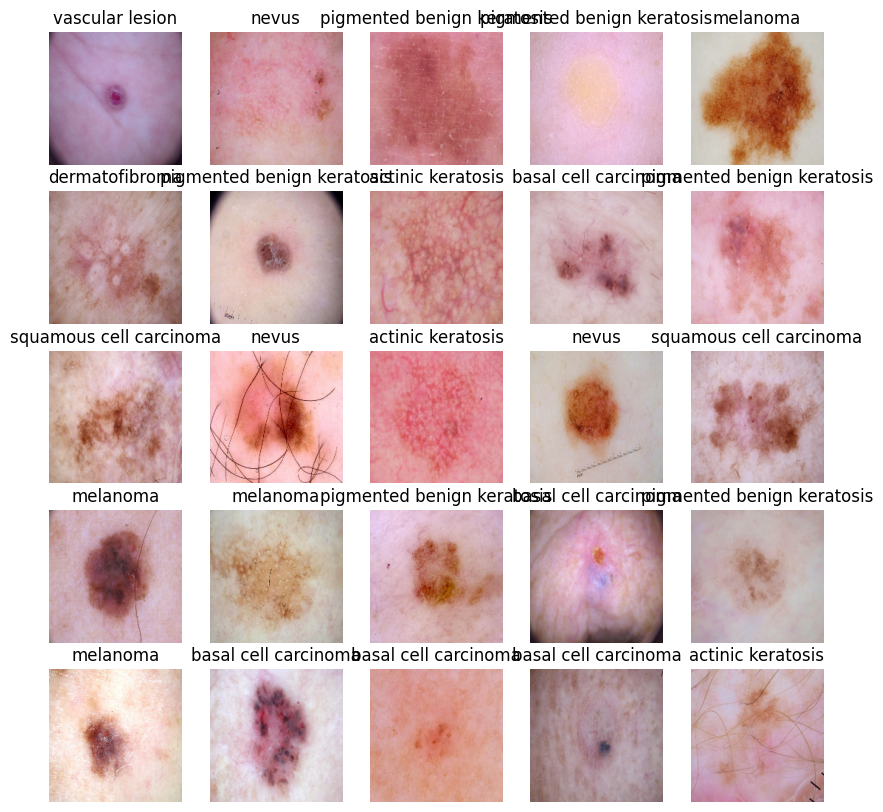

In [12]:
#plot the sample images
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [13]:
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Rescaling the images

In [14]:
#use normlization layer
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
train_image_batch,train_labels_batch = next(iter(normalized_training_set))

Compile the model

In [15]:
# model
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9))
model.add(Activation('softmax'))


In [16]:
#model.summary()

In [17]:
#Compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Train the model

In [18]:
#train the model
epochs = 20
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 155s 3s/step - loss: 50.1891 - accuracy: 0.2015 - val_loss: 1.9714 - val_accuracy: 0.2237
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.9258 - accuracy: 0.2974 - val_loss: 1.9769 - val_accuracy: 0.2796
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.8768 - accuracy: 0.3164 - val_loss: 1.9432 - val_accuracy: 0.2953
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.7812 - accuracy: 0.3806 - val_loss: 1.9021 - val_accuracy: 0.3647
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.7103 - accuracy: 0.4051 - val_loss: 1.8209 - val_accuracy: 0.4228
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4563 - accuracy: 0.4950 - val_loss: 1.8996 - val_accuracy: 0.4049
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3130 - accuracy: 0.5301 - val_loss: 2.1004 - val_accuracy: 0.3647
Epoch 8/20
5

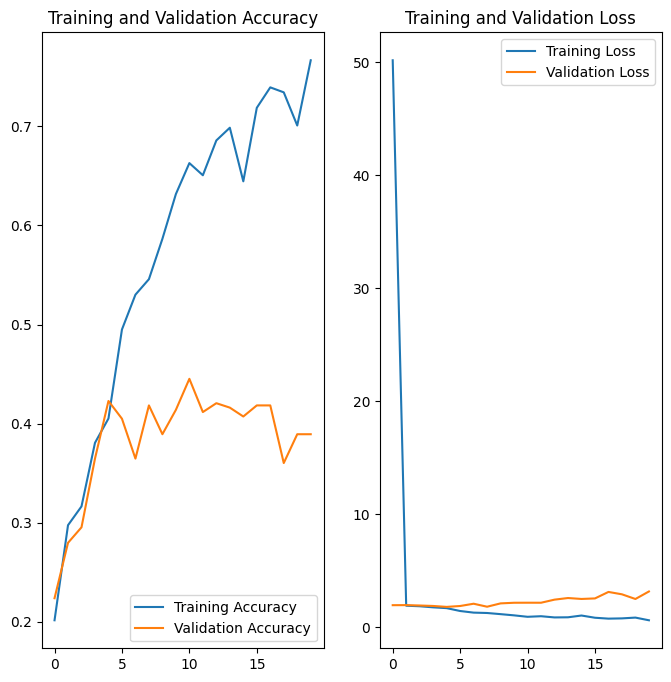

In [19]:
#Plot the accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# model
model = Sequential()
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9))
model.add(Activation('softmax'))


In [21]:
#compile model again
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
#traim the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 71ms/step - loss: 14.6752 - accuracy: 0.2048 - val_loss: 2.0613 - val_accuracy: 0.1767
Epoch 2/20
56/56 [==============================] - 3s 62ms/step - loss: 2.0575 - accuracy: 0.1964 - val_loss: 2.0449 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 4s 64ms/step - loss: 2.0408 - accuracy: 0.2026 - val_loss: 2.0345 - val_accuracy: 0.2304
Epoch 4/20
56/56 [==============================] - 4s 63ms/step - loss: 2.0181 - accuracy: 0.2137 - val_loss: 2.0392 - val_accuracy: 0.1700
Epoch 5/20
56/56 [==============================] - 4s 65ms/step - loss: 1.9834 - accuracy: 0.2578 - val_loss: 2.0095 - val_accuracy: 0.3154
Epoch 6/20
56/56 [==============================] - 4s 70ms/step - loss: 2.0126 - accuracy: 0.2545 - val_loss: 2.1254 - val_accuracy: 0.2036
Epoch 7/20
56/56 [==============================] - 4s 79ms/step - loss: 2.0984 - accuracy: 0.2109 - val_loss: 2.0779 - val_accuracy: 0.2058
Epoch 8/20
5

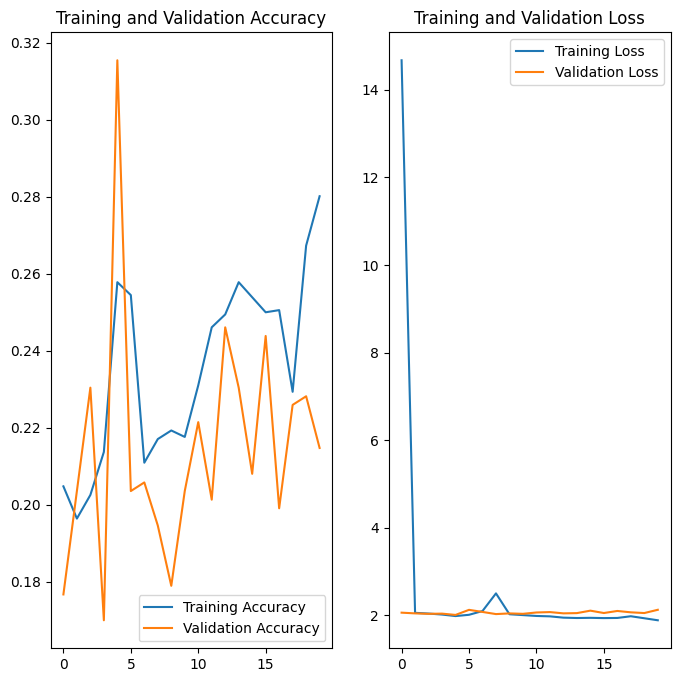

In [23]:
#Visualize the accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Since train and test accuracy both are low, seems to be case of underfitting.
we can use augumentation to get more dataset.

In [24]:
# Lets do data augumentaion as the model seems to be overfitting
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

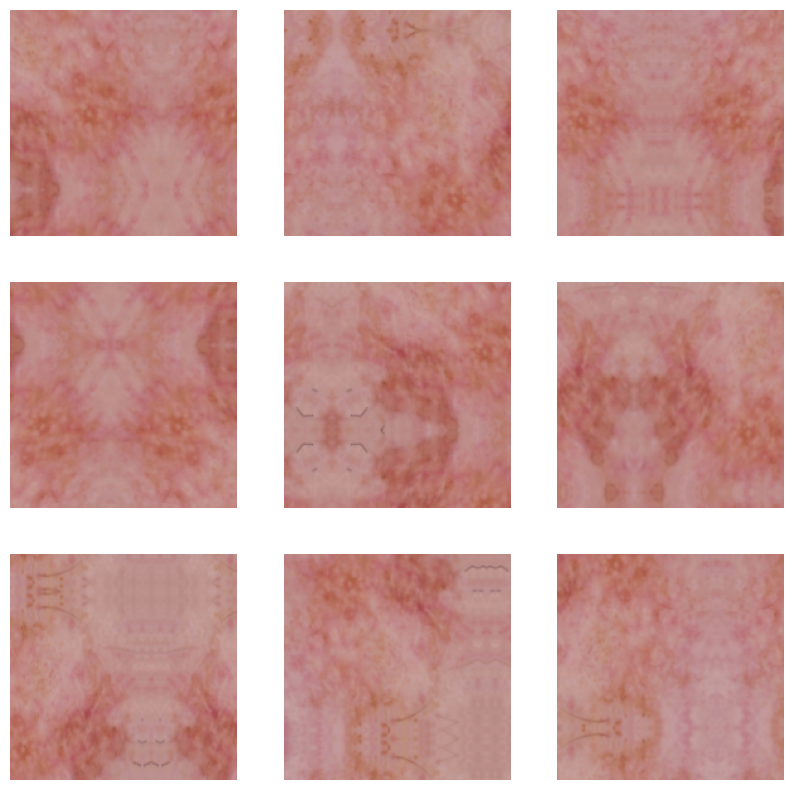

In [25]:
# visualize how  augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
## Using Dropout layer since there was overfitting
# model
model2 = Sequential(data_augmentation)
model2.add(Conv2D(64, 3, padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(256, 3, padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(9))
model2.add(Activation('softmax'))

In [27]:
## Compiling the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [28]:
## train the model for augumented data for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 13s 164ms/step - loss: 56.2616 - accuracy: 0.1942 - val_loss: 2.0659 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 7s 121ms/step - loss: 2.0796 - accuracy: 0.2439 - val_loss: 2.0784 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 7s 118ms/step - loss: 2.0991 - accuracy: 0.2020 - val_loss: 2.1733 - val_accuracy: 0.2148
Epoch 4/20
56/56 [==============================] - 7s 127ms/step - loss: 2.1458 - accuracy: 0.2065 - val_loss: 2.1285 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 7s 124ms/step - loss: 2.0930 - accuracy: 0.2115 - val_loss: 2.0850 - val_accuracy: 0.2125
Epoch 6/20
56/56 [==============================] - 7s 127ms/step - loss: 2.0554 - accuracy: 0.2121 - val_loss: 2.0331 - val_accuracy: 0.2036
Epoch 7/20
56/56 [==============================] - 7s 117ms/step - loss: 2.0274 - accuracy: 0.2121 - val_loss: 2.0404 - val_accuracy: 0.2036
Epoch 8/20
56/5

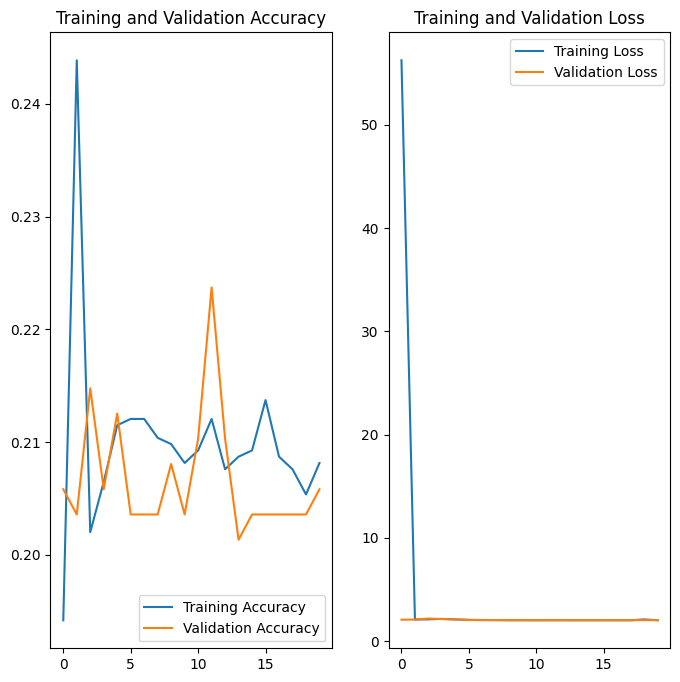

In [29]:
#visualize the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Real time data augumentation

In [30]:
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
#https://keras.io/api/preprocessing/image/
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=data_dir_train,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=data_dir_test,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [31]:
#create,train and compile the model
# model
model3 = Sequential()
model3.add(Conv2D(16, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(9))
model3.add(Activation('softmax'))

# Compile the model
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 20

history = model3.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20
)


Epoch 1/20
23/23 [==============================] - 165s 7s/step - loss: 2.3685 - accuracy: 0.1809 - val_loss: 2.2074 - val_accuracy: 0.1695
Epoch 2/20
23/23 [==============================] - 70s 3s/step - loss: 1.8610 - accuracy: 0.3260 - val_loss: 2.1609 - val_accuracy: 0.2034
Epoch 3/20
23/23 [==============================] - 70s 3s/step - loss: 1.6425 - accuracy: 0.4212 - val_loss: 2.2147 - val_accuracy: 0.2966
Epoch 4/20
23/23 [==============================] - 69s 3s/step - loss: 1.5138 - accuracy: 0.4913 - val_loss: 1.9857 - val_accuracy: 0.3220
Epoch 5/20
23/23 [==============================] - 67s 3s/step - loss: 1.5180 - accuracy: 0.4712 - val_loss: 2.1863 - val_accuracy: 0.2797
Epoch 6/20
23/23 [==============================] - 77s 3s/step - loss: 1.4507 - accuracy: 0.4757 - val_loss: 1.9988 - val_accuracy: 0.3729
Epoch 7/20
23/23 [==============================] - 73s 3s/step - loss: 1.3672 - accuracy: 0.5217 - val_loss: 2.1646 - val_accuracy: 0.3729
Epoch 8/20
23/23 [=

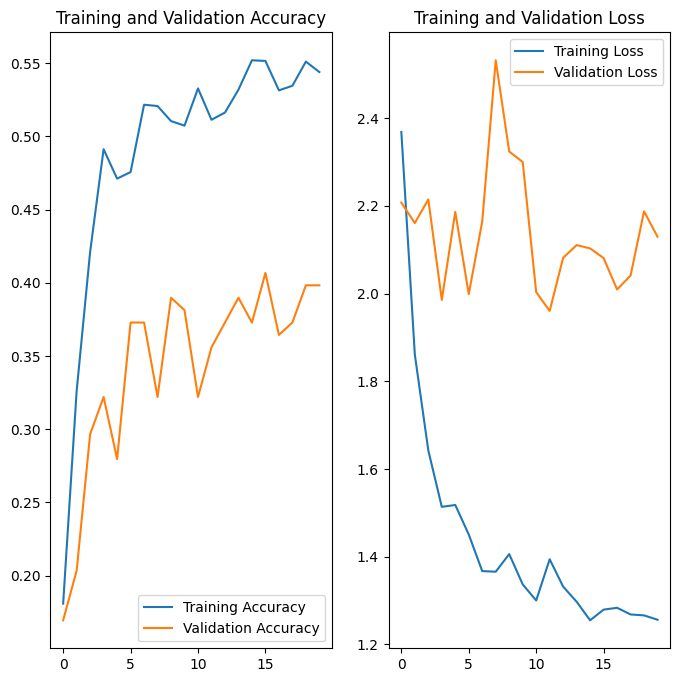

In [32]:
#visualize the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Check class imbalance


In [33]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [34]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/My Drive/Assignment_images/Train/seborr...,seborrheic keratosis
1,gdrive/My Drive/Assignment_images/Train/seborr...,seborrheic keratosis
2,gdrive/My Drive/Assignment_images/Train/seborr...,seborrheic keratosis
3,gdrive/My Drive/Assignment_images/Train/seborr...,seborrheic keratosis
4,gdrive/My Drive/Assignment_images/Train/seborr...,seborrheic keratosis
...,...,...
2234,gdrive/My Drive/Assignment_images/Train/basal ...,basal cell carcinoma
2235,gdrive/My Drive/Assignment_images/Train/basal ...,basal cell carcinoma
2236,gdrive/My Drive/Assignment_images/Train/basal ...,basal cell carcinoma
2237,gdrive/My Drive/Assignment_images/Train/basal ...,basal cell carcinoma


Class=6, n=77 (3.439%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=0, n=114 (5.092%)
Class=3, n=438 (19.562%)
Class=7, n=181 (8.084%)
Class=2, n=95 (4.243%)
Class=8, n=139 (6.208%)
Class=1, n=376 (16.793%)


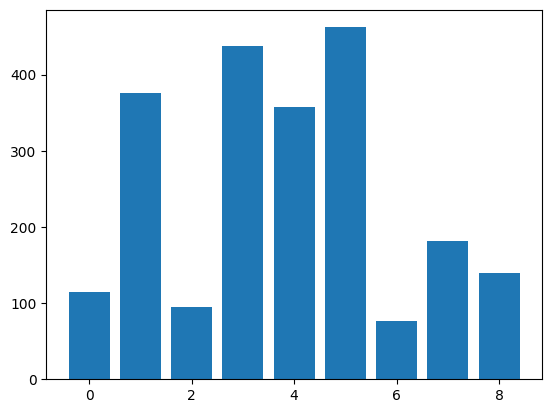

In [35]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

We could see that class 6  has minimum data samples
We could see that class 5  has maximum data samples

we can use python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

In [37]:
import Augmentor

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [38]:
path_to_training_dataset="/content/gdrive/MyDrive/Assignment_images/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC0CE139480>: 100%|██████████| 500/500 [00:22<00:00, 21.91 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC0C4E76170>: 100%|██████████| 500/500 [00:23<00:00, 21.19 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC0C5FB9060>: 100%|██████████| 500/500 [00:22<00:00, 22.13 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x7DC0C4FC3490>: 100%|██████████| 500/500 [01:50<00:00,  4.54 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7DC0CE129A50>: 100%|██████████| 500/500 [01:20<00:00,  6.20 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC1540D29E0>: 100%|██████████| 500/500 [00:19<00:00, 25.54 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DC0C5FF54B0>: 100%|██████████| 500/500 [00:41<00:00, 12.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC1577D4C10>: 100%|██████████| 500/500 [00:18<00:00, 27.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_images/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC140200370>: 100%|██████████| 500/500 [00:18<00:00, 26.71 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [40]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/My Drive/Assignment_images/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011077.jpg_bfb562f9-c382-4c66-92a8-f4293c531082.jpg',
 'gdrive/My Drive/Assignment_images/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011130.jpg_b10e1aec-658e-4639-9ef6-cd1e2b3ec58f.jpg',
 'gdrive/My Drive/Assignment_images/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011031.jpg_eb6d8c42-6064-426e-82a6-86b165e00e5a.jpg',
 'gdrive/My Drive/Assignment_images/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010872.jpg_1616e697-834a-4809-acf0-04ee413280cf.jpg',
 'gdrive/My Drive/Assignment_images/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010993.jpg_9c5deb9d-6800-47a7-af2c-315895fe0e53.jpg',
 'gdrive/My Drive/Assignment_images/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011056.jpg_c7c20a3f-6aa1-48b3-9bd6-f8faeed3befa.jpg',
 'gdrive/My Drive/Assignment_images/Trai

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [42]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [43]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-43-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [44]:
new_df['Label'].value_counts()


pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

Train the model on the data created using Augmentor¶

In [45]:
batch_size = 32
img_height = 180
img_width = 180

In [46]:
#create train and validation dataset
(train_ds),(val_ds) = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels='inferred',validation_split=0.2,subset="both",image_size=(img_height,img_width),seed=123)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Using 1347 files for validation.


In [47]:
#creating model using normalization
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_training_set = train_ds.map(lambda x, y: (normalization_layer(x), y))
train_image_batch,train_labels_batch = next(iter(normalized_training_set))

# model
model4 = Sequential()
model4.add(Conv2D(16, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(Conv2D(32, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(Conv2D(64, 3, padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(9))
model4.add(Activation('softmax'))

In [48]:
#Compile and train the model
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 20
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 13s 64ms/step - loss: 8.1340 - accuracy: 0.3583 - val_loss: 1.5675 - val_accuracy: 0.4105
Epoch 2/20
169/169 [==============================] - 5s 27ms/step - loss: 1.3104 - accuracy: 0.5308 - val_loss: 1.1556 - val_accuracy: 0.5820
Epoch 3/20
169/169 [==============================] - 4s 26ms/step - loss: 1.0109 - accuracy: 0.6400 - val_loss: 1.3442 - val_accuracy: 0.5887
Epoch 4/20
169/169 [==============================] - 4s 25ms/step - loss: 0.7793 - accuracy: 0.7274 - val_loss: 1.0153 - val_accuracy: 0.6830
Epoch 5/20
169/169 [==============================] - 4s 26ms/step - loss: 0.6212 - accuracy: 0.7854 - val_loss: 0.9967 - val_accuracy: 0.6607
Epoch 6/20
169/169 [==============================] - 5s 27ms/step - loss: 0.4902 - accuracy: 0.8403 - val_loss: 0.9813 - val_accuracy: 0.7045
Epoch 7/20
169/169 [==============================] - 4s 25ms/step - loss: 0.4129 - accuracy: 0.8568 - val_loss: 1.0410 - val_accuracy: 0.7023
Epoch 8/2

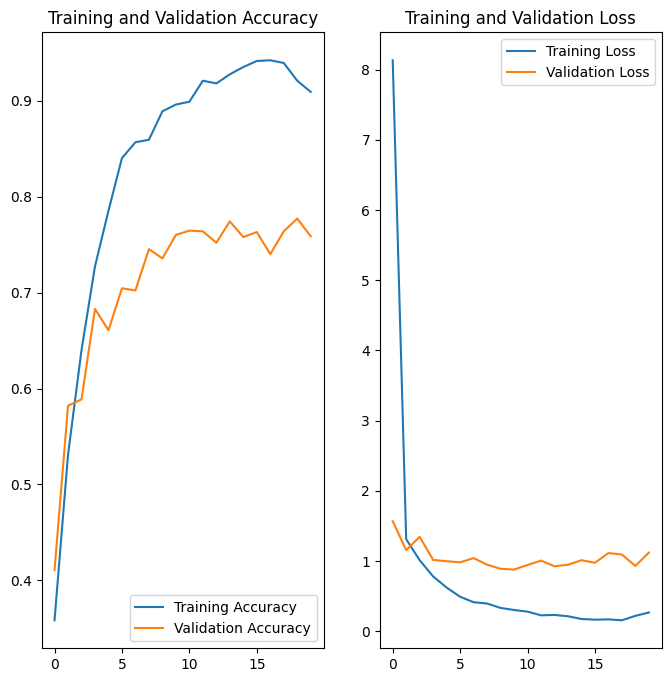

In [49]:
#visualize the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
#testing the model on test dataset
test_ds= tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,labels='inferred',validation_split=0.0,subset=None,image_size=(img_height,img_width),seed=123)


Found 118 files belonging to 9 classes.


In [52]:
epochs = 20
history = model4.fit(
  test_ds,
  epochs=epochs
)

Epoch 1/20
4/4 [==============================] - 6s 154ms/step - loss: 5.9774 - accuracy: 0.2119
Epoch 2/20
4/4 [==============================] - 6s 37ms/step - loss: 1.8759 - accuracy: 0.4492
Epoch 3/20
4/4 [==============================] - 5s 33ms/step - loss: 1.4404 - accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 4s 33ms/step - loss: 1.2969 - accuracy: 0.5508
Epoch 5/20
4/4 [==============================] - 4s 35ms/step - loss: 1.0892 - accuracy: 0.6186
Epoch 6/20
4/4 [==============================] - 6s 35ms/step - loss: 0.7602 - accuracy: 0.7458
Epoch 7/20
4/4 [==============================] - 4s 33ms/step - loss: 0.5688 - accuracy: 0.8305
Epoch 8/20
4/4 [==============================] - 6s 35ms/step - loss: 0.5070 - accuracy: 0.8559
Epoch 9/20
4/4 [==============================] - 5s 33ms/step - loss: 0.3015 - accuracy: 0.8898
Epoch 10/20
4/4 [==============================] - 4s 33ms/step - loss: 0.4282 - accuracy: 0.8898
Epoch 11/20
4/4 [===========